## **Importação das bibliotecas**



In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# **Leitura do Dataframe**

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# **Pré-Análise do dados**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

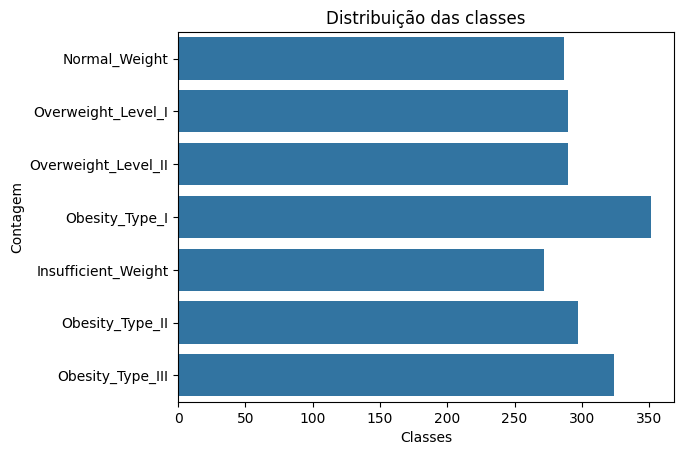

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificando a distribuição das classes
sns.countplot(df['NObeyesdad'])
plt.title('Distribuição das classes')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()

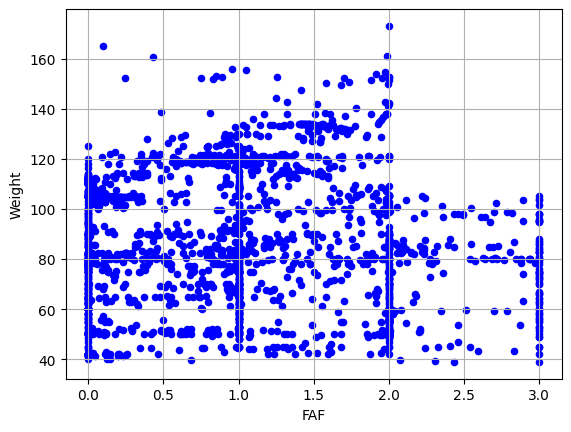

In [10]:
#Média de peso por quantidade de horas exercitadas no dia
df.plot.scatter(x='FAF', y='Weight', c='blue', grid=True);

# **Pré-Processamento dos dados**


In [11]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['family_history_with_overweight'] = label_encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = label_encoder.fit_transform(df['FAVC'])
df['CAEC'] = label_encoder.fit_transform(df['CAEC'])
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])
df['SCC'] = label_encoder.fit_transform(df['SCC'])
df['CALC'] = label_encoder.fit_transform(df['CALC'])
df['MTRANS'] = label_encoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# **Criação dos modelos e pipelines**

In [12]:
x = df.drop('NObeyesdad', axis = 1)
y = df['NObeyesdad']

In [13]:
mod1 = KNeighborsClassifier()
mod2 = RandomForestClassifier(random_state=42)
mod3 = DecisionTreeClassifier(random_state=42)

In [14]:
param_grid = [
    {   'classifier': [mod1],
        'classifier__n_neighbors': [3, 5, 7],
    },
     {  'classifier': [mod2],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {   'classifier': [mod3],
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }
]


In [15]:
pipeline = Pipeline([
    ('classifier', mod1)
])

In [16]:
pipeline_with_scaling = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', mod1)
])

# **GridSearch com e sem escalonamento dos dados** Victor Gabriel

In [17]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', return_train_score=True)
grid_search_with_scaling = GridSearchCV(pipeline_with_scaling, param_grid, cv=3, scoring='f1_macro', return_train_score=True)

In [18]:
#Separação dos dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.1, random_state = 42)

In [19]:
#Treinando os modelos com e sem escalonamento do dados
grid_search.fit(x_train, y_train)
grid_search_with_scaling.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [3, 5, 7]},
                         {'classifier': [RandomForestClassifier(random_state=42)],
                          'classifier__max_depth': [None, 5, 10],
                          'classifier__min_samples_split': [2, 5, 10],
                          'classifier__n_estimators': [50, 100, 200]},
                         {'classifier': [DecisionTreeClassifier(random_state=42)],
                          'classifier__max_depth': [None, 5, 10, 20],
                          'classifier__min_samples_leaf': [1, 2, 4],
                          'classifier__min_samples_split': [2, 5, 10]}],
             return_train_score=True, scoring='f1_macro')

# **Comparação dos scores f-1 com e sem o escalonamento de dados**

In [20]:
print("Melhores parâmetros sem escalonamento:", grid_search.best_params_)
print("Melhor F1-Score sem escalonamento:", grid_search.best_score_)
print("\nMelhores parâmetros com escalonamento:", grid_search_with_scaling.best_params_)
print("Melhor F1-Score com escalonamento:", grid_search_with_scaling.best_score_)

Melhores parâmetros sem escalonamento: {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Melhor F1-Score sem escalonamento: 0.9522178039165348

Melhores parâmetros com escalonamento: {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Melhor F1-Score com escalonamento: 0.9527673747677375


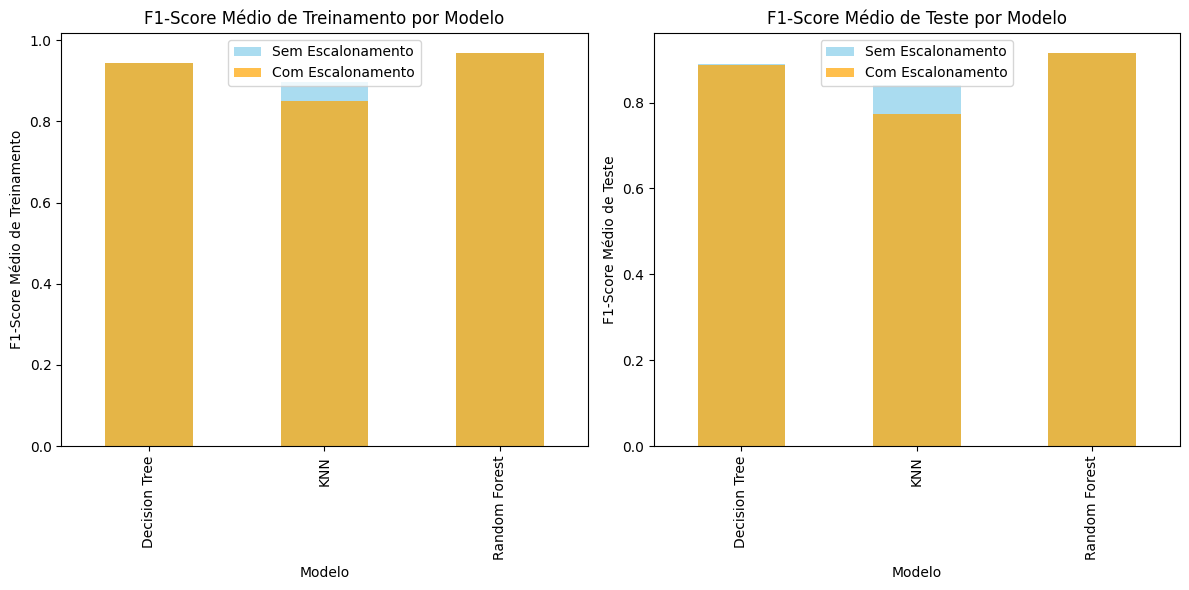

In [21]:
#Criação dos gráficos representando os scores f1 sobre os dados de treino e teste

results_no_scaling = pd.DataFrame(grid_search.cv_results_)
results_with_scaling = pd.DataFrame(grid_search_with_scaling.cv_results_)


model_labels = {
    'KNeighborsClassifier()': 'KNN',
    'RandomForestClassifier(random_state=42)': 'Random Forest',
    'DecisionTreeClassifier(random_state=42)': 'Decision Tree'
}


results_no_scaling['param_classifier'] = results_no_scaling['param_classifier'].apply(lambda x: model_labels[str(x)])
results_with_scaling['param_classifier'] = results_with_scaling['param_classifier'].apply(lambda x: model_labels[str(x)])

results_no_scaling['mean_train_score'] = pd.to_numeric(results_no_scaling['mean_train_score'], errors='coerce')
results_no_scaling['mean_test_score'] = pd.to_numeric(results_no_scaling['mean_test_score'], errors='coerce')
results_with_scaling['mean_train_score'] = pd.to_numeric(results_with_scaling['mean_train_score'], errors='coerce')
results_with_scaling['mean_test_score'] = pd.to_numeric(results_with_scaling['mean_test_score'], errors='coerce')


mean_train_scores_no_scaling = results_no_scaling.groupby('param_classifier')['mean_train_score'].mean()
mean_test_scores_no_scaling = results_no_scaling.groupby('param_classifier')['mean_test_score'].mean()

mean_train_scores_with_scaling = results_with_scaling.groupby('param_classifier')['mean_train_score'].mean()
mean_test_scores_with_scaling = results_with_scaling.groupby('param_classifier')['mean_test_score'].mean()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mean_train_scores_no_scaling.plot(kind='bar', color='skyblue', alpha=0.7, label='Sem Escalonamento')
mean_train_scores_with_scaling.plot(kind='bar', color='orange', alpha=0.7, label='Com Escalonamento')
plt.title('F1-Score Médio de Treinamento por Modelo')
plt.xlabel('Modelo')
plt.ylabel('F1-Score Médio de Treinamento')
plt.legend()

plt.subplot(1, 2, 2)
mean_test_scores_no_scaling.plot(kind='bar', color='skyblue', alpha=0.7, label='Sem Escalonamento')
mean_test_scores_with_scaling.plot(kind='bar', color='orange', alpha=0.7, label='Com Escalonamento')
plt.title('F1-Score Médio de Teste por Modelo')
plt.xlabel('Modelo')
plt.ylabel('F1-Score Médio de Teste')
plt.legend()

plt.tight_layout()
plt.show()

# **Comparação dos modelos utilizando validação cruzada com e sem o escalonamento dos dados**

In [22]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('DTC', DecisionTreeClassifier(random_state=42))
]

results = []

for name, model in models:
    pipeline_cross = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Avaliação utilizando validação cruzada com k-Fold
    scores = cross_val_score(pipeline_cross, x_train, y_train, cv=cv, scoring='f1_macro')
    results.append((name, scores.mean(), scores.std()))

In [23]:
results_df = pd.DataFrame(results, columns=['Model', 'Mean F1-Score', 'Std Dev'])

In [24]:
# Avaliação dos resultados
results_df

,Model,Mean F1-Score,Std Dev
0,Random Forest,0.946642,0.007611
1,KNN,0.770692,0.013354
2,DTC,0.915703,0.014578


In [25]:
models_no_esc = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('DTC', DecisionTreeClassifier(random_state=42))
]

results_no_esc = []

for name, model in models_no_esc:
    pipeline_cross_no_esc = Pipeline([
        ('model', model)
    ])


    # Avaliação utilizando validação cruzada com k-Fold
    scores = cross_val_score(pipeline_cross_no_esc, x_train, y_train, cv=cv, scoring='f1_macro')
    results_no_esc.append((name, scores.mean(), scores.std()))

In [26]:
results_df_no_esc = pd.DataFrame(results_no_esc, columns=['Model', 'Mean F1-Score', 'Std Dev'])

In [27]:
results_df_no_esc

,Model,Mean F1-Score,Std Dev
0,Random Forest,0.947645,0.008026
1,KNN,0.839930,0.008305
2,DTC,0.916307,0.015118
